## Visual story telling part 1: green buildings

We disagree with the conclusions drawn by the on-staff statistics guru. The guru oversimplifies the complexity of the research by cleaning the data and concentrating on median rents, even if the method may seem reasonable. The research ignores the impact of the other 20+ factors in the dataset, which might have a major impact on rental prices, by only comparing the median rentals between green-certified and non-green properties. This method overlooks important confounding variables that can help explain the observed rent variations, such building size, age, location, and amenities. Because of this, the proposal that is based just on these rent comparisons has weaknesses and may result in an inaccurate evaluation of the financial advantages of investing in green certification. To make an educated choice, a more thorough study that takes these other factors into account is necessary.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('greenbuildings.csv')

df.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [19]:
df.describe()


,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
count,7.894000e+03,7894.000000,7.894000e+03,7820.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,...,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000
mean,4.530025e+05,588.615024,2.346377e+05,3.206720,28.418569,82.606371,13.584495,47.243983,0.379529,0.399924,...,0.086775,0.034710,0.526602,1229.354193,3432.042311,4661.396504,31.081312,0.011336,0.030959,27.497285
std,7.434053e+05,399.907509,2.975334e+05,8.162989,15.075483,21.380315,12.287083,32.194393,0.485300,0.489913,...,0.281523,0.183056,0.499323,1104.588925,1976.937255,1984.326881,11.575219,0.002406,0.008534,10.598952
min,1.000000e+00,1.000000,1.624000e+03,-24.950000,2.980000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,39.000000,0.000000,2103.000000,10.460000,0.009487,0.017800,9.000000
25%,1.574520e+05,272.000000,5.089125e+04,1.740000,19.500000,77.850000,4.000000,23.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,684.000000,1419.000000,2869.000000,22.710000,0.010296,0.023300,20.000000
50%,3.132530e+05,476.000000,1.288380e+05,1.970000,25.160000,89.530000,10.000000,34.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,966.000000,2739.000000,4979.000000,23.160000,0.010296,0.032737,25.145000
75%,4.411885e+05,1044.000000,2.942120e+05,2.380000,34.180000,96.440000,19.000000,79.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1620.000000,4796.000000,6413.000000,43.890000,0.011816,0.037808,34.000000
max,6.208103e+06,1230.000000,3.781045e+06,67.780000,250.000000,100.000000,110.000000,187.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5240.000000,7200.000000,8244.000000,58.020000,0.028914,0.062800,71.440000


- Rent: The rent per square foot varies significantly, with a range of
approximately \$9 to \$71.44.
- Green Certification: Approximately 8.68% of the buildings are green-certified (either LEED or EnergyStar).
- Leasing Rate: The average leasing rate is around 82.6% while median is 89.53%
- Building Characteristics: Buildings vary widely in size, age, and other attributes.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7894 entries, 0 to 7893
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CS_PropertyID      7894 non-null   int64  
 1   cluster            7894 non-null   int64  
 2   size               7894 non-null   int64  
 3   empl_gr            7820 non-null   float64
 4   Rent               7894 non-null   float64
 5   leasing_rate       7894 non-null   float64
 6   stories            7894 non-null   int64  
 7   age                7894 non-null   int64  
 8   renovated          7894 non-null   int64  
 9   class_a            7894 non-null   int64  
 10  class_b            7894 non-null   int64  
 11  LEED               7894 non-null   int64  
 12  Energystar         7894 non-null   int64  
 13  green_rating       7894 non-null   int64  
 14  net                7894 non-null   int64  
 15  amenities          7894 non-null   int64  
 16  cd_total_07        7894 

In [21]:
green_df = df[df['green_rating'] == 1]
non_green_df = df[df['green_rating'] == 0]

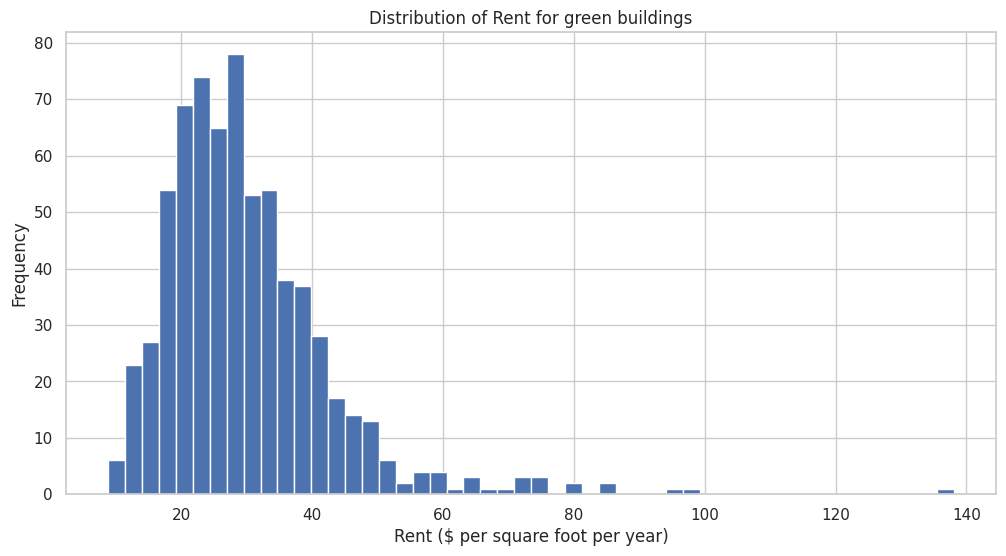

In [22]:
green_df['Rent'].hist(bins=50, figsize=(12, 6))
plt.xlabel('Rent ($ per square foot per year)')
plt.ylabel('Frequency')
plt.title('Distribution of Rent for green buildings')
plt.show()

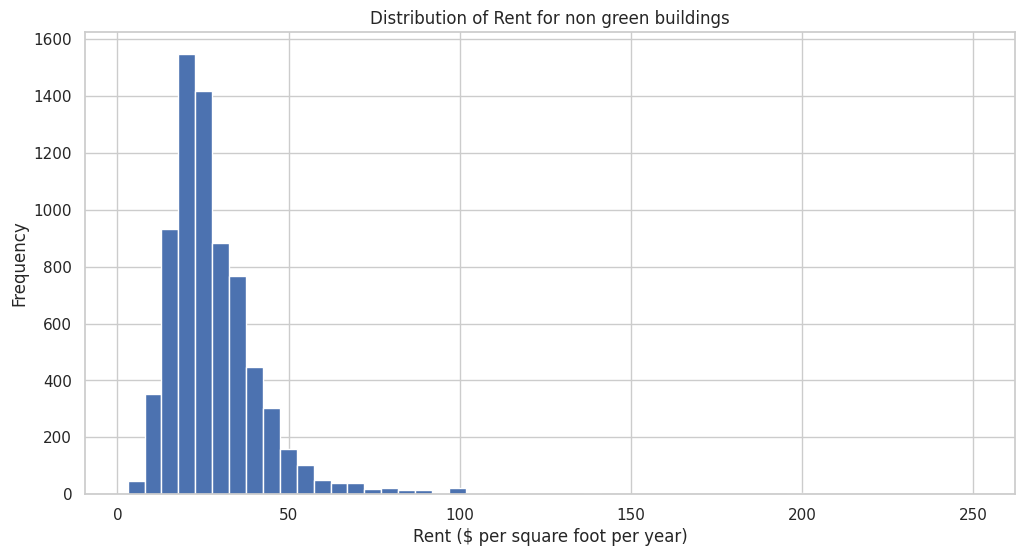

In [23]:
non_green_df['Rent'].hist(bins=50, figsize=(12, 6))
plt.xlabel('Rent ($ per square foot per year)')
plt.ylabel('Frequency')
plt.title('Distribution of Rent for non green buildings')
plt.show()

In [24]:
pearson_corr = df.corr()
spearman_corr = df.corr(method='spearman')

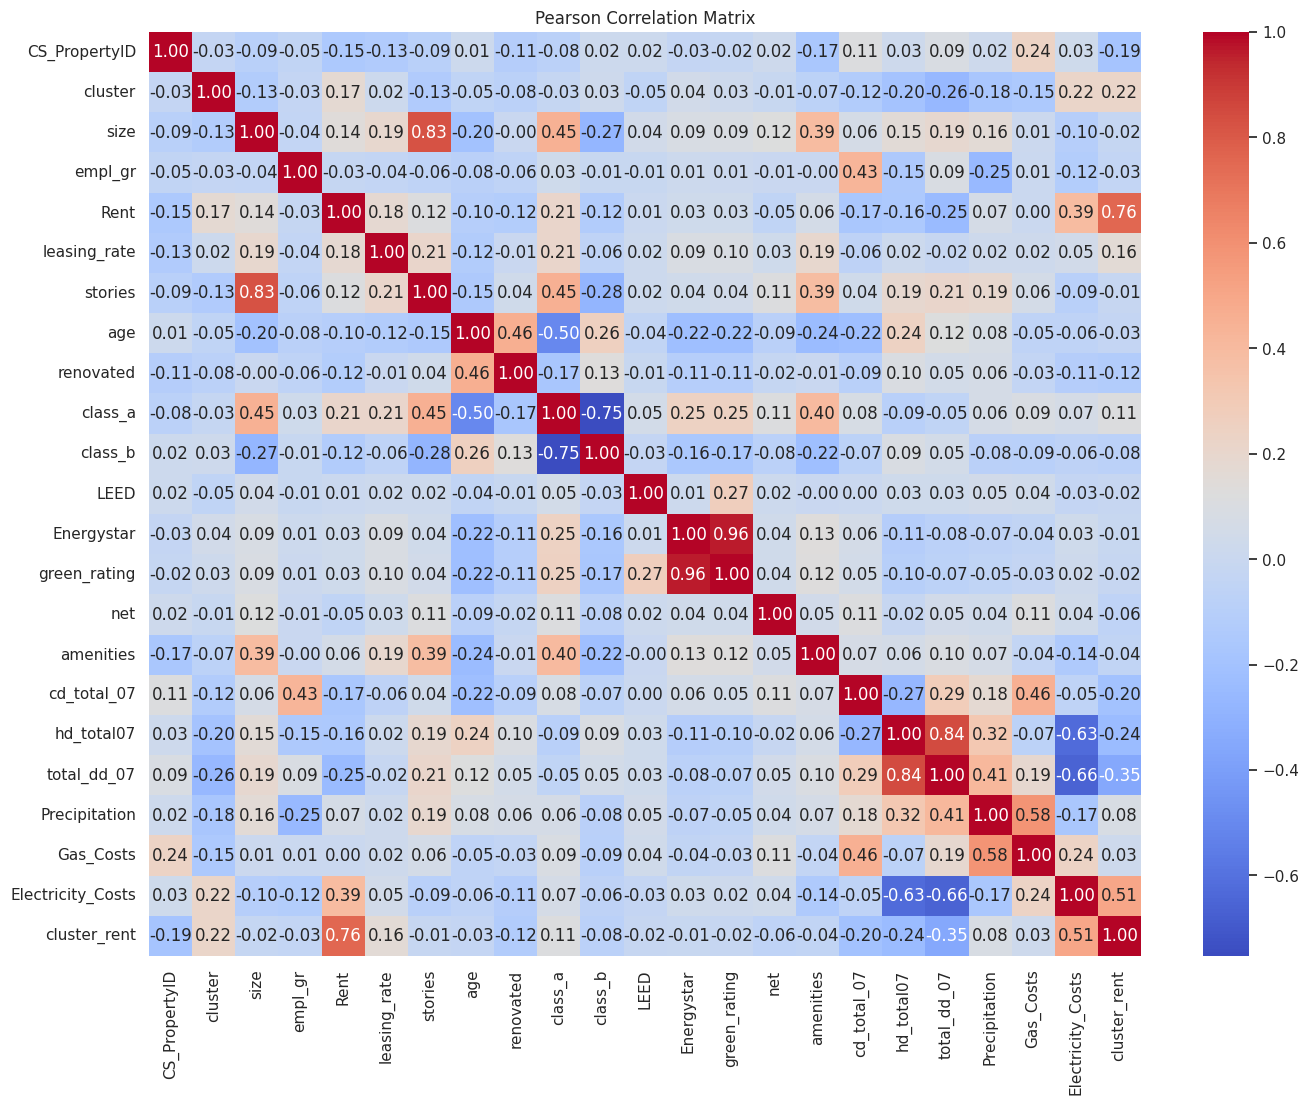

In [25]:
plt.figure(figsize=(16, 12))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

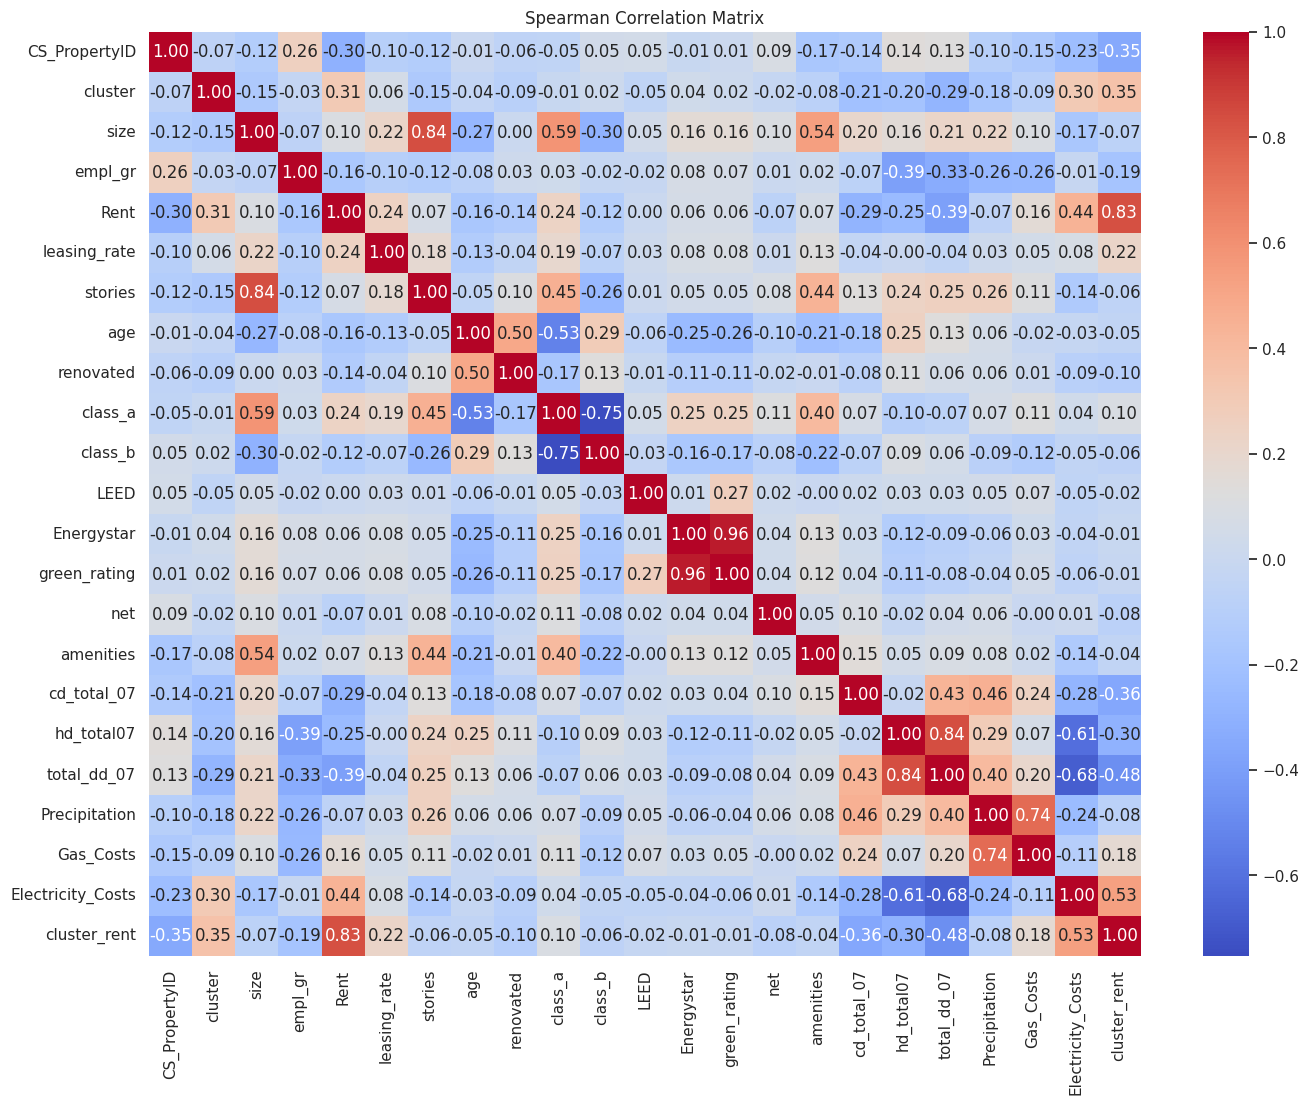

In [26]:
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()

*  From the above 2 correlation matrices we can obeserve that 'rent',
'green_rating', 'size', 'leasing_rate', 'Electricity_Costs', 'Gas_Costs' are important variables wrt to our problem statement

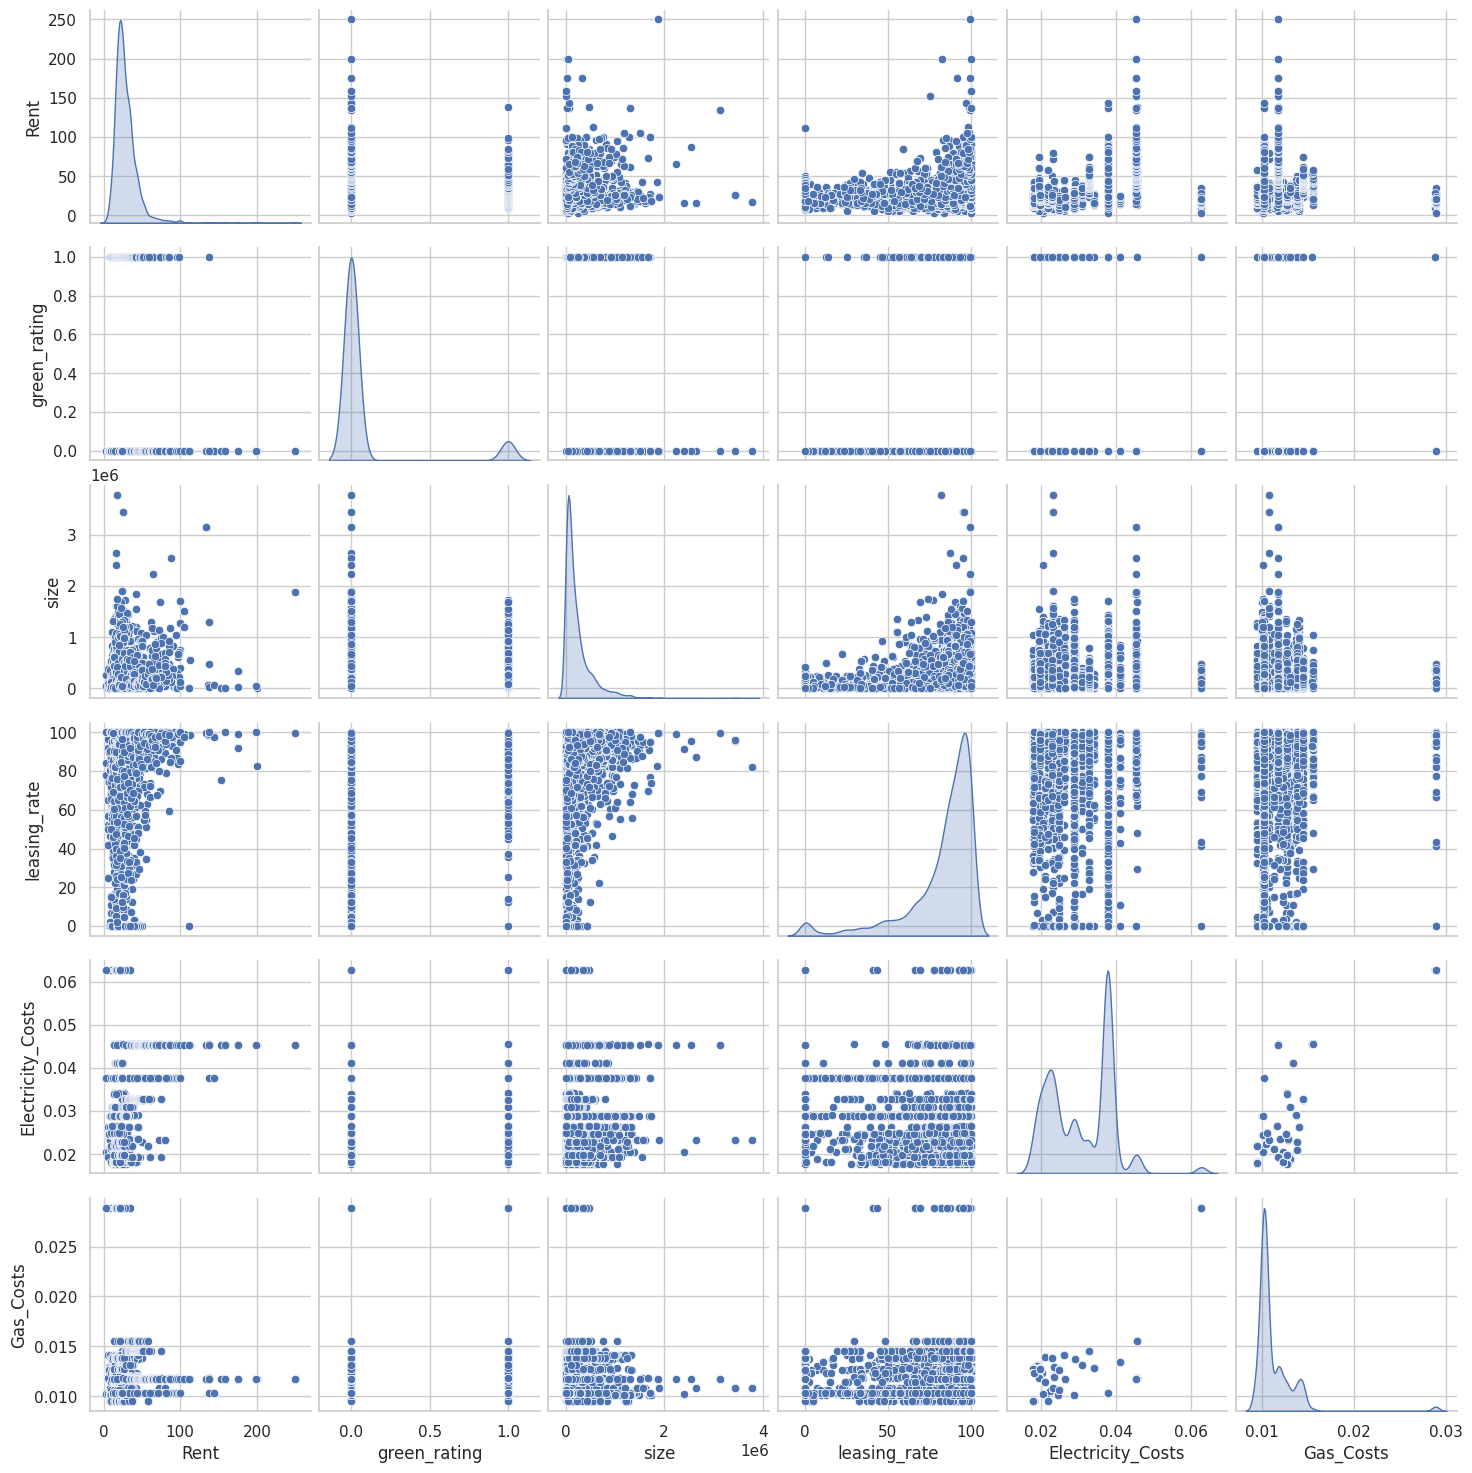

In [27]:
columns_of_interest = ['Rent', 'green_rating', 'size', 'leasing_rate', 'Electricity_Costs', 'Gas_Costs']
subset_data = df[columns_of_interest]
sns.pairplot(subset_data, diag_kind='kde')
plt.show()

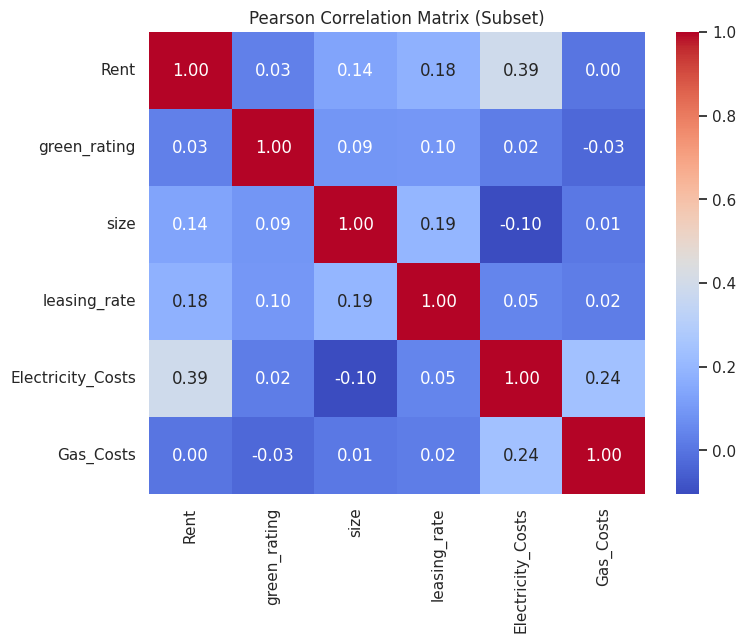

In [28]:
pearson_corr_subset = subset_data.corr()
spearman_corr_subset = subset_data.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr_subset, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix (Subset)')
plt.show()

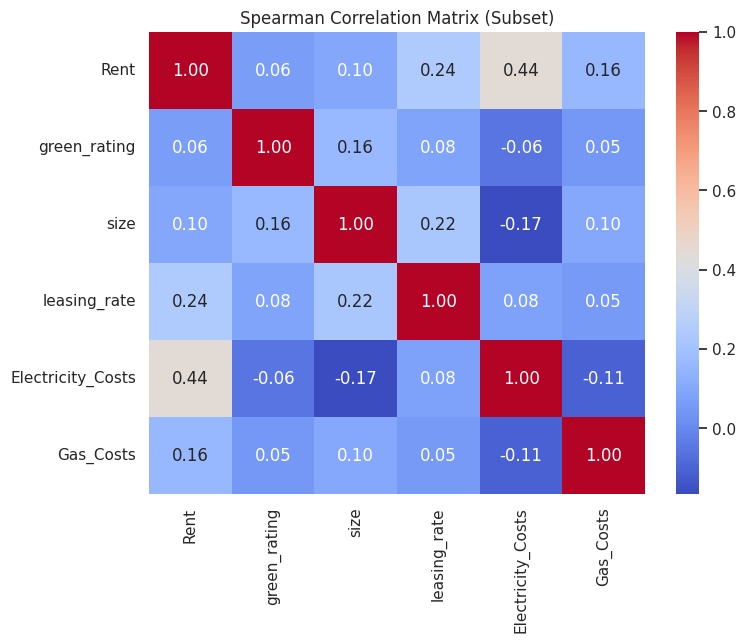

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_subset, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix (Subset)')
plt.show()

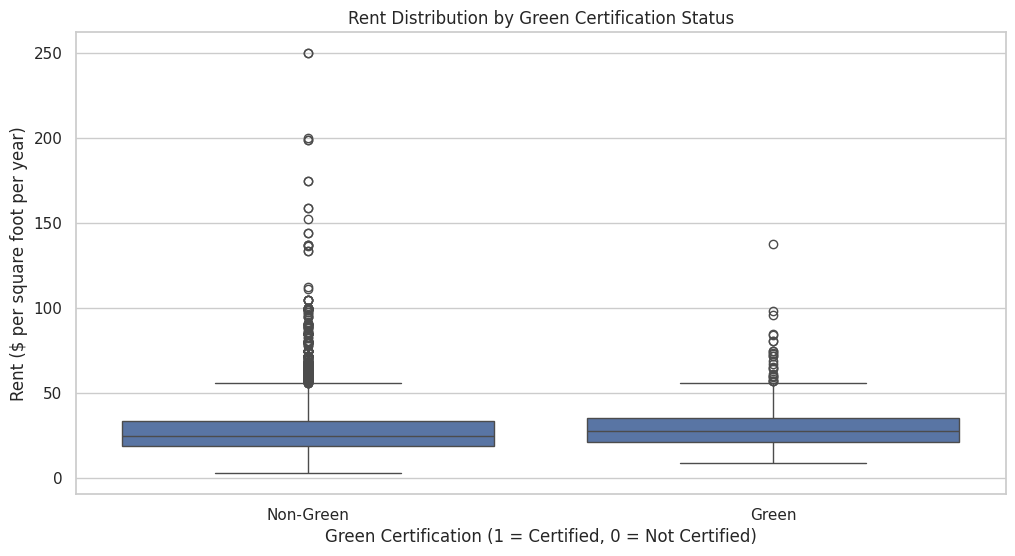

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='green_rating', y='Rent', data=df)
plt.title('Rent Distribution by Green Certification Status')
plt.xlabel('Green Certification (1 = Certified, 0 = Not Certified)')
plt.ylabel('Rent ($ per square foot per year)')
plt.xticks([0, 1], ['Non-Green', 'Green'])
plt.show()

- Green-Certified Buildings have higher median rent per square foot per year as compared to Non-Green Buildings

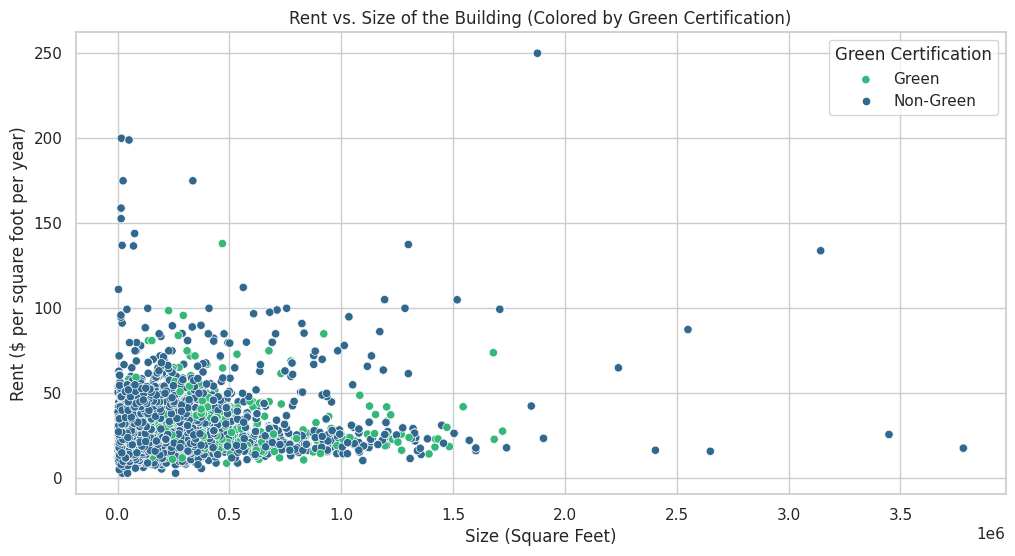

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='size', y='Rent', hue='green_rating', data=df, palette='viridis')
plt.title('Rent vs. Size of the Building (Colored by Green Certification)')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Rent ($ per square foot per year)')
plt.legend(title='Green Certification', loc='upper right', labels=['Green','Non-Green'])
plt.show()

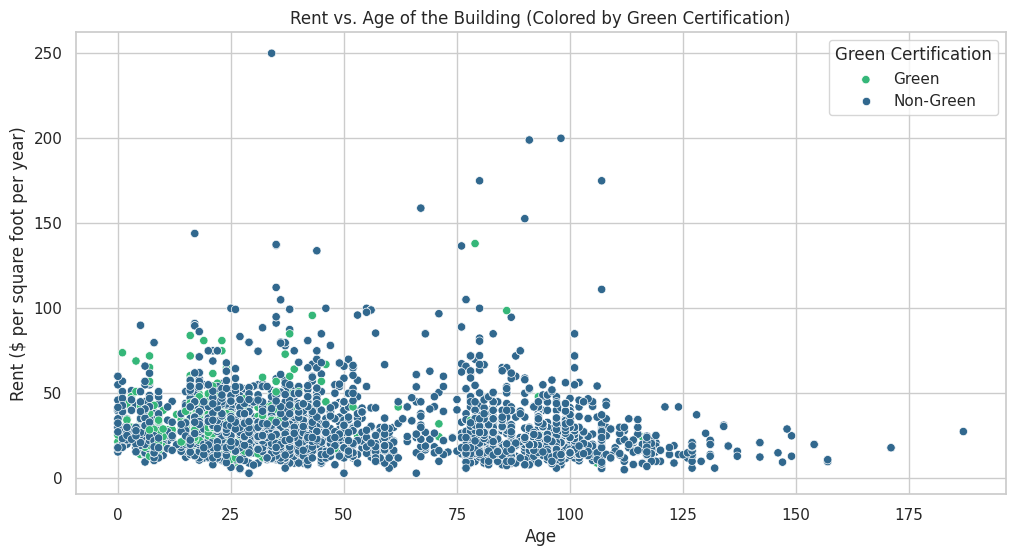

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='Rent', hue='green_rating', data=df, palette='viridis')
plt.title('Rent vs. Age of the Building (Colored by Green Certification)')
plt.xlabel('Age')
plt.ylabel('Rent ($ per square foot per year)')
plt.legend(title='Green Certification', loc='upper right', labels=['Green','Non-Green'])
plt.show()

###KEY FINDINGS:
- For a green building make sure it has the energystar certfication rather than any other certification
-	There is a minute +ve trend between green certification and rent, suggesting that green buildings might command higher rents. However, the scatterplot indicates that the correlation is not very strong, and there are many non-green buildings with high rents as well.
-	This suggests that while green certification could contribute to higher rents, other factors are also at play, and green certification alone may not guarantee higher revenue, contradicting what was suggested by the guru in the earlier analysis
-	The plot shows a positive relationship between building size and rent, especially in larger buildings, which tend to have higher rents.
-	Buildings with higher occupancy rates tend to charge higher rents. Green buildings, being more attractive to sustainability-conscious tenants, may achieve higher occupancy, leading to increased and consistent revenue.
-	Buildings with lower electricity costs, often due to energy efficiency, tend to command slightly higher rents. This suggests that the energy savings in green buildings could lead to increased rental income, supporting the case for green certification.
-	The plot shows an unclear relationship between gas costs and rent. Though if we observe the electricity cost and other utilities, we can see that utilities in general do have an impact on the rent being higher than usual.
-	A positive relationship between leasing rates and green certification suggests that green buildings might attract more tenants and lead to higher occupancy rates, which can stabilize revenue and improve ROI.
-	Investing in green certification for larger buildings might be more economically viable due to the potential for higher rent and occupancy rates.
-	Larger buildings might have more resources to invest in green certification, and the increased rent in larger buildings could make the return on investment for green certification more favourable.






---

**CONCLUSION:**
-  The analysis suggests that while green buildings might command higher rents and have better occupancy rates, the decision to invest in green certification should consider the size of the building, potential energy savings, and the local market's demand for sustainable spaces. Larger buildings, in particular, might see a more favorable return on investment due to these factors.
-  A more detailed regression analysis could quantify these relationships and help predict the economic returns from investing in green buildings. Additionally, a cost-benefit analysis that includes construction costs, potential rent premiums, and utility savings would provide a clearer picture of the financial viability of such an investment.


